

19M2100: CAMDOM TAGNE MARIE-NOELLE

19M2215: MEKATE FOGUE GARLY CATHY

19M2361: SIMO NOUMSI MARTHE BLANCHE

19M2348: NGAH ABANDA STEVE JORDAN


LES LIGNES DE SEPARATION AUX RESEAUX DE NEURONES

LIGNES DE SEPARATION

Construction d'une ligne qui separe les citrons des oranges

In [1]:
#importation des bibliotheques
import matplotlib.pyplot as plt
import numpy as np

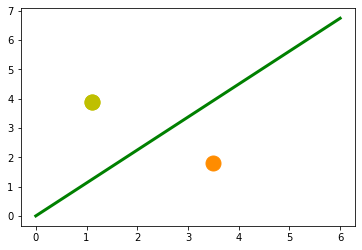

In [2]:
#construction du separateur
X = np.arange(0, 7)
fig, ax = plt.subplots()
ax.plot(3.5, 1.8, "or",
color="darkorange",
markersize=15)
ax.plot(1.1, 3.9, "oy",
markersize=15)
point_on_line = (4, 4.5)
ax.plot(1.1, 3.9, "oy", markersize=15)
# calculate gradient:
m = point_on_line[1] / point_on_line[0]
ax.plot(X, m * X, "g-", linewidth=3)
plt.show()

On entre un autre fruit au modele pour voir comment il va classer

In [3]:
lemon = (1.1, 3.9)
orange = (3.5, 1.8)
m = 4.5 / 4
# check if orange is below the line,
# positive value is expected:
print(orange[0] * m - orange[1])
# check if lemon is above the line,
# negative value is expected:
print(lemon[0] * m - lemon[1])

2.1375
-2.6624999999999996


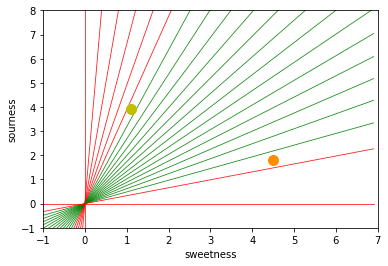

In [4]:
import numpy as np
import matplotlib.pyplot as plt
def create_distance_function(a, b, c):
    """ 0 = ax + by + c """
    def distance(x, y):
        """
        returns tuple (d, pos)
        d is the distance
        If pos == -1 point is below the line,
        0 on the line and +1 if above the line
        """
        nom = a * x + b * y + c
        if nom == 0:
            pos = 0
        elif (nom<0 and b<0) or (nom>0 and b>0):
            pos = -1
        else:
            pos = 1
        return (np.absolute(nom) / np.sqrt( a ** 2 + b ** 2), pos)
    return distance

orange = (4.5, 1.8)
lemon = (1.1, 3.9)
fruits_coords = [orange, lemon]

fig, ax = plt.subplots()
ax.set_xlabel("sweetness")
ax.set_ylabel("sourness")
x_min, x_max = -1, 7
y_min, y_max = -1, 8
ax.set_xlim([x_min, x_max])
ax.set_ylim([y_min, y_max])
X = np.arange(x_min, x_max, 0.1)

step = 0.05
for x in np.arange(0, 1+step, step):
    slope = np.tan(np.arccos(x))
    dist4line1 = create_distance_function(slope, -1, 0)
    Y = slope * X
    results = []
    for point in fruits_coords:
        results.append(dist4line1(*point))
    if (results[0][1] != results[1][1]):
        ax.plot(X, Y, "g-", linewidth=0.8, alpha=0.9)
    else:
        ax.plot(X, Y, "r-", linewidth=0.8, alpha=0.9)
       
size = 10
for (index, (x, y)) in enumerate(fruits_coords):
    if index== 0:
        ax.plot(x, y, "o",
                color="darkorange",
                markersize=size)
    else:
        ax.plot(x, y, "oy",
                markersize=size)
plt.show()


        

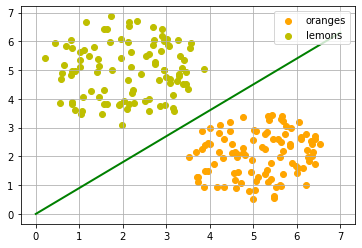

In [5]:
import numpy as np
import matplotlib.pyplot as plt
def points_within_circle(radius,
                         center=(0, 0),
                         number_of_points=100):
    center_x, center_y = center
    r = radius * np.sqrt(np.random.random((number_of_points,)))
    theta = np.random.random((number_of_points,)) * 2 * np.pi
    x = center_x + r * np.cos(theta)
    y = center_y + r * np.sin(theta)
    return x, y
X = np.arange(0, 8)
fig, ax = plt.subplots()
oranges_x, oranges_y = points_within_circle(1.6, (5, 2), 100)
lemons_x, lemons_y = points_within_circle(1.9, (2, 5), 100)

ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")

ax.plot(X, 0.9 * X, "g-", linewidth=2)
ax.legend()
ax.grid()
plt.show()

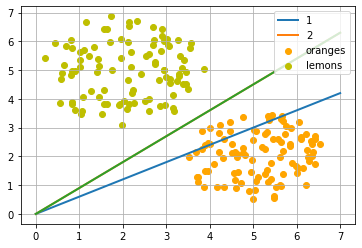

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import repeat
from random import shuffle

X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")
fruits = list(zip(oranges_x,
                  oranges_y,
                  repeat(0, len(oranges_x))))
fruits += list(zip(lemons_x,
                   lemons_y,
                   repeat(1, len(oranges_x))))
shuffle(fruits)

def adjust(learning_rate=0.3, slope=0.3):
    line = None
    counter = 0
    for x, y, label in fruits:
        res = slope * x - y
        #print(label, res)
        if label == 0 and res < 0:
            # point is above line but should be below
            # => increment slope
            slope += learning_rate
            counter += 1
            ax.plot(X, slope * X,
                    linewidth=2, label=str(counter))
        elif label == 1 and res > 0:
            # point is below line but should be above
            # => decrement slope
            #print(res, label)
            slope -= learning_rate
            counter += 1
            ax.plot(X, slope * X,
                    linewidth=2, label=str(counter))
    return slope

slope = adjust()
ax.plot(X,
        slope * X,
        linewidth=2)
ax.legend()
ax.grid()
plt.show()



In [7]:
print(slope)

0.8999999999999999


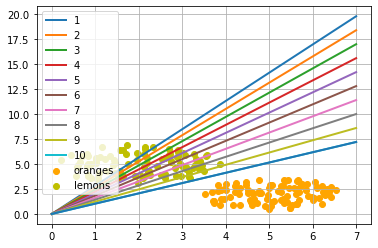

1.0299999999999991


In [8]:
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")
slope = adjust(learning_rate=0.2, slope=3.03)
ax.plot(X,
        slope * X,
        linewidth=2)
ax.legend()
ax.grid()
plt.show()
print(slope)

In [9]:
import numpy as np
class Perceptron:
    def __init__(self, weights):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)

    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        return weighted_sum
p = Perceptron(weights=[-0.45, 0.5])
for point in zip(oranges_x[:10], oranges_y[:10]):
    res = p(point)
    print(res, end=", ")
for point in zip(lemons_x[:10], lemons_y[:10]):
    res = p(point)
    print(res, end=", ")


-0.8192373554146473, -1.6223749582903757, -1.6485219953625598, -0.7731601204800636, -2.1814501611104222, -1.0863030608789908, -0.5650917958429669, -0.7320581729038733, -1.0873269034566841, -0.2744521117927483, 2.041283794244496, 1.5758402870644441, 1.7168891651297322, 1.5654483977325129, 1.041505562569393, 2.291718564122405, 1.3776860967041142, 2.192805495340725, 1.3965178427426883, 1.0252969755582988, 

In [10]:
from collections import Counter
evaluation = Counter()
for point in zip(oranges_x, oranges_y):
    res = p(point)
    if res < 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
for point in zip(lemons_x, lemons_y):
    res = p(point)
    if res >= 0:
        evaluation['corrects'] += 1
    else:
        evaluation['wrongs'] += 1
print(evaluation)


Counter({'corrects': 200})


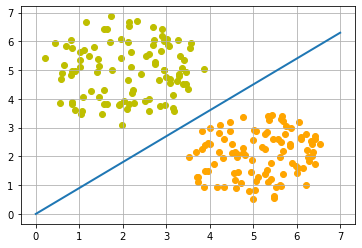

0.9


In [11]:
import time
import matplotlib.pyplot as plt
slope = 0.1
X = np.arange(0, 8)
fig, ax = plt.subplots()
ax.scatter(oranges_x,
           oranges_y,
           c="orange",
           label="oranges")
ax.scatter(lemons_x,
           lemons_y,
           c="y",
           label="lemons")
slope = 0.45 / 0.5
ax.plot(X, slope * X, linewidth=2)
ax.grid()
plt.show()
print(slope)

Entrainement du reseau de neurone

In [12]:
from sklearn.model_selection import train_test_split
import random
oranges = list(zip(oranges_x, oranges_y))
lemons = list(zip(lemons_x, lemons_y))
# labelling oranges with 0 and lemons with 1:
labelled_data = list(zip(oranges + lemons,
                         [0] * len(oranges) + [1] * len(lemons)))
random.shuffle(labelled_data)
data, labels = zip(*labelled_data)
res = train_test_split(data, labels,
                       train_size=0.8,
                       test_size=0.2,
                       random_state=42)
train_data, test_data, train_labels, test_labels = res
print(train_data[:10], train_labels[:10])

[(0.8397028131149589, 3.8263308721568974), (2.1481162066690183, 6.550230595441735), (5.268743760934173, 1.3856857123080277), (0.8069683344584546, 4.83412477146828), (3.0867037766547334, 4.690102497229347), (5.628987401931826, 0.9815855172562238), (5.006155296860039, 0.5268247947585698), (1.4101449395082244, 4.917421305201361), (1.633272646269331, 6.425083656364907), (1.968429517952326, 6.09191550353444)] [1, 1, 0, 1, 1, 0, 0, 1, 1, 1]


In [13]:
import numpy as np
from collections import Counter
class Perceptron:
    def __init__(self,
                 weights,
                 learning_rate=0.1):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.learning_rate = learning_rate
    
    @staticmethod
    def unit_step_function(x):
        if x < 0:
            return 0
        else:
            return 1
    def __call__(self, in_data):
        weighted_input = self.weights * in_data
        weighted_sum = weighted_input.sum()
        #print(in_data, weighted_input, weighted_sum)
        return Perceptron.unit_step_function(weighted_sum)
    def adjust(self,
               target_result,
               calculated_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data) #
            error = target_result - calculated_result
        if error != 0:
            correction = error * in_data * self.learning_rate
            self.weights += correction
            #print(target_result, calculated_result, error, in_data, correction, self.weights)
    def evaluate(self, data, labels):
        evaluation = Counter()
        for index in range(len(data)):
            label = int(round(p(data[index]),0))
            if label == labels[index]:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation
    
p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)
for index in range(len(train_data)):
    p.adjust(train_labels[index],
             p(train_data[index]),
             train_data[index])
evaluation = p.evaluate(train_data, train_labels)
print(evaluation.most_common())
evaluation = p.evaluate(test_data, test_labels)
print(evaluation.most_common())
print(p.weights)

[('correct', 160)]
[('correct', 40)]
[-1.23853263  1.13453172]


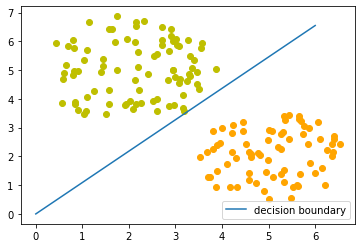

[-1.23853263  1.13453172]


In [14]:
import matplotlib.pyplot as plt
import numpy as np
X = np.arange(0, 7)
fig, ax = plt.subplots()
lemons = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 1]
lemons_x, lemons_y = zip(*lemons)
oranges = [train_data[i] for i in range(len(train_data)) if train_labels[i] == 0]
oranges_x, oranges_y = zip(*oranges)
ax.scatter(oranges_x, oranges_y, c="orange")
ax.scatter(lemons_x, lemons_y, c="y")
w1 = p.weights[0]
w2 = p.weights[1]
m = -w1 / w2
ax.plot(X, m * X, label="decision boundary")
ax.legend()
plt.show()
print(p.weights)

2 -4.68988385089166 [-1.48062313 -0.31570571] (5.268743760934173, 1.3856857123080277)
3 1.0916685788221685 [-1.23853263  1.13453172] (0.8069683344584546, 4.83412477146828)


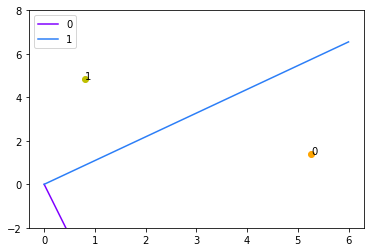

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
p = Perceptron(weights=[0.1, 0.1],
               learning_rate=0.3)
number_of_colors = 7
colors = cm.rainbow(np.linspace(0, 1, number_of_colors))
fig, ax = plt.subplots()
ax.set_xticks(range(8))
ax.set_ylim([-2, 8])
counter = 0
for index in range(len(train_data)):
    old_weights = p.weights.copy()
    p.adjust(train_labels[index],
             p(train_data[index]),
             train_data[index])
    if not np.array_equal(old_weights, p.weights):
        color = "orange" if train_labels[index] == 0 else "y"
        ax.scatter(train_data[index][0],
                   train_data[index][1],
                   color=color)
        ax.annotate(str(counter),
                    (train_data[index][0], train_data[index][1]))
        m = -p.weights[0] / p.weights[1]
        print(index, m, p.weights, train_data[index])
        ax.plot(X, m * X, label=str(counter), color=colors[counter])
        counter += 1
ax.legend()
plt.show()

[]

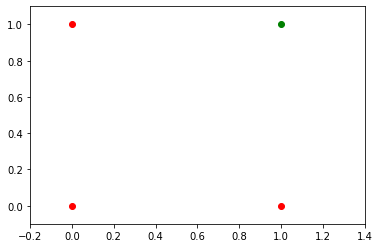

In [16]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
#ax.plot(X, m * X + 1.2, label="decision boundary")
plt.plot()


[]

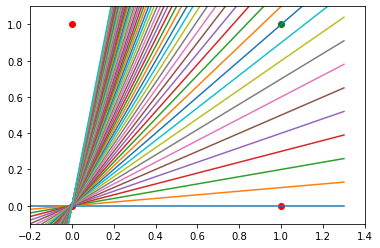

In [17]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -1
for m in np.arange(0, 6, 0.1):
    ax.plot(X, m * X )
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
plt.plot()

[]

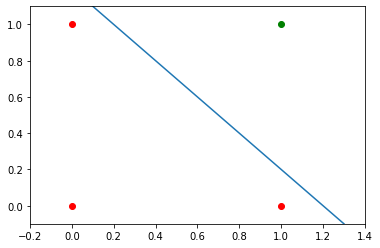

In [18]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m, c = -1, 1.2
ax.plot(X, m * X + c )
plt.plot()

In [19]:
import numpy as np
from collections import Counter
class Perceptron:
    def __init__(self,
                 weights,
                 bias=1,
                 learning_rate=0.3):
        """
        'weights' can be a numpy array, list or a tuple with the
        actual values of the weights. The number of input values
        is indirectly defined by the length of 'weights'
        """
        self.weights = np.array(weights)
        self.bias = bias
        self.learning_rate = learning_rate
    @staticmethod
    def unit_step_function(x):
        if x <= 0:
            return 0
        else:
            return 1
    def __call__(self, in_data):
        in_data = np.concatenate( (in_data, [self.bias]) )
        result = self.weights @ in_data
        return Perceptron.unit_step_function(result)
    def adjust(self,
               target_result,
               in_data):
        if type(in_data) != np.ndarray:
            in_data = np.array(in_data) #
        calculated_result = self(in_data)
        error = target_result - calculated_result
        if error != 0:
            in_data = np.concatenate( (in_data, [self.bias]) )
            correction = error * in_data * self.learning_rate
            self.weights += correction
    def evaluate(self, data, labels):
        evaluation = Counter()
        for sample, label in zip(data, labels):
            result = self(sample) # predict
            if result == label:
                evaluation["correct"] += 1
            else:
                evaluation["wrong"] += 1
        return evaluation

In [20]:
import numpy as np
from perceptrons import Perceptron
def labelled_samples(n):
    for _ in range(n):
        s = np.random.randint(0, 2, (2,))
        yield (s, 1) if s[0] == 1 and s[1] == 1 else (s, 0)
p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.2)
for in_data, label in labelled_samples(30):
    p.adjust(label,
             in_data)
test_data, test_labels = list(zip(*labelled_samples(30)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)

ModuleNotFoundError: ignored

IndexError: ignored

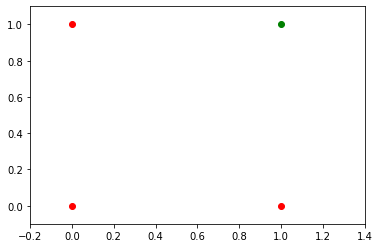

In [21]:
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.4
X = np.arange(xmin, xmax, 0.1)
ax.scatter(0, 0, color="r")
ax.scatter(0, 1, color="r")
ax.scatter(1, 0, color="r")
ax.scatter(1, 1, color="g")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()

In [22]:
from sklearn.datasets import make_blobs
n_samples = 250
samples, labels = make_blobs(n_samples=n_samples,
                             centers=([2.5, 3], [6.7, 7.9]),
                             random_state=0)

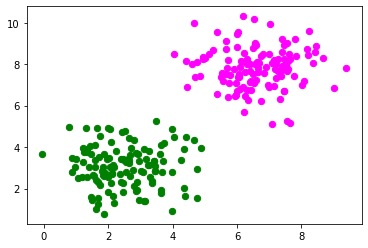

In [23]:
import matplotlib.pyplot as plt
colours = ('green', 'magenta', 'blue', 'cyan', 'yellow', 'red')
fig, ax = plt.subplots()

for n_class in range(2):
    ax.scatter(samples[labels==n_class][:, 0], samples[labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))

In [24]:
n_learn_data = int(n_samples * 0.8) # 80 % of available data points
learn_data, test_data = samples[:n_learn_data], samples[-n_learn_data:]
learn_labels, test_labels = labels[:n_learn_data], labels[-n_learn_data:]
from perceptrons import Perceptron
p = Perceptron(weights=[0.3, 0.3, 0.3],
learning_rate=0.8)
for sample, label in zip(learn_data, learn_labels):
    p.adjust(label,
             sample)
evaluation = p.evaluate(learn_data, learn_labels)
print(evaluation)

ModuleNotFoundError: ignored

IndexError: ignored

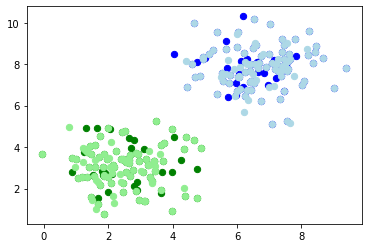

In [25]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
# plotting learn data
colours = ('green', 'blue')
for n_class in range(2):
    ax.scatter(learn_data[learn_labels==n_class][:, 0],
               learn_data[learn_labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))
# plotting test data
colours = ('lightgreen', 'lightblue')
for n_class in range(2):
    ax.scatter(test_data[test_labels==n_class][:, 0],
               test_data[test_labels==n_class][:, 1],
               c=colours[n_class], s=40, label=str(n_class))
    
X = np.arange(np.max(samples[:,0]))
m = -p.weights[0] / p.weights[1]
c = -p.weights[2] / p.weights[1]
print(m, c)
ax.plot(X, m * X + c )
plt.plot()
plt.show()

In [26]:
from perceptrons import Perceptron
p = Perceptron(weights=[0.3, 0.3, 0.3],
               bias=1,
               learning_rate=0.2)
def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 1) if s[0] >= 0.5 and s[1] >= 0.5 else (s, 0)
for in_data, label in labelled_samples(30):
    p.adjust(label,
             in_data)
test_data, test_labels = list(zip(*labelled_samples(60)))
evaluation = p.evaluate(test_data, test_labels)
print(evaluation)


ModuleNotFoundError: ignored

IndexError: ignored

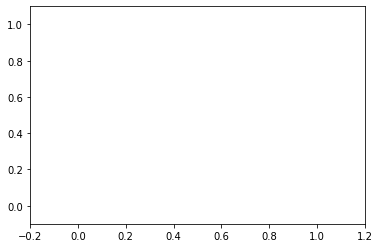

In [27]:
import matplotlib.pyplot as plt
import numpy as np
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

In [28]:
from perceptrons import Perceptron
import numpy as np
from collections import Counter
def labelled_samples(n):
    for _ in range(n):
        s = np.random.random((2,))
        yield (s, 0) if s[0] < 0.5 else (s, 1)
p = Perceptron(weights=[0.3, 0.3, 0.3],
               learning_rate=0.4)
for in_data, label in labelled_samples(300):
    p.adjust(label,
             in_data)
test_data, test_labels = list(zip(*labelled_samples(500)))
print(p.weights)
p.evaluate(test_data, test_labels)

ModuleNotFoundError: ignored

IndexError: ignored

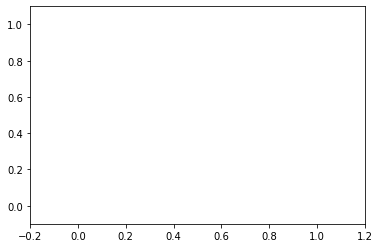

In [29]:
import matplotlib.pyplot as plt
import numpy as np
ones = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 1]
zeroes = [test_data[i] for i in range(len(test_data)) if test_labels[i] == 0]
fig, ax = plt.subplots()
xmin, xmax = -0.2, 1.2
X, Y = list(zip(*ones))
ax.scatter(X, Y, color="g")
X, Y = list(zip(*zeroes))
ax.scatter(X, Y, color="r")
ax.set_xlim([xmin, xmax])
ax.set_ylim([-0.1, 1.1])
c = -p.weights[2] / p.weights[1]
m = -p.weights[0] / p.weights[1]
X = np.arange(xmin, xmax, 0.1)
ax.plot(X, m * X + c, label="decision boundary")

In [30]:
p.weights, m

(array([-1.23853263,  1.13453172]), 1.0916685788221685)

RESEAUX DE NEURONES, STRUCTURE,POIDS ET MATRICE

In [31]:
import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


In [32]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)
print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


In [33]:
import numpy as np
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))

True


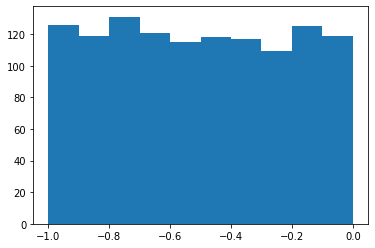

In [34]:
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

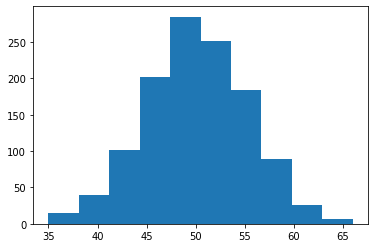

In [35]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()

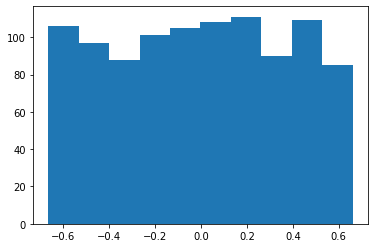

In [36]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()

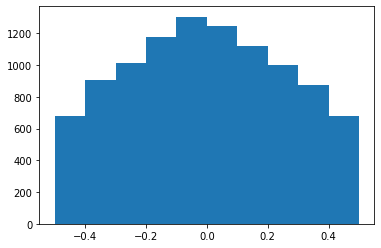

In [37]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
         (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()

(array([0.00066178, 0.00347437, 0.01886085, 0.07048002, 0.17719274,
        0.31087316, 0.38979093, 0.35240012, 0.23576064, 0.09496604]),
 array([3.95569591, 4.5601225 , 5.16454908, 5.76897567, 6.37340225,
        6.97782884, 7.58225542, 8.18668201, 8.79110859, 9.39553518,
        9.99996176]),
 <a list of 10 Patch objects>)

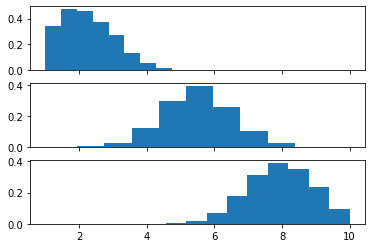

In [38]:
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)

In [39]:
no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[-0.20695763, -0.02963458,  0.31510168],
       [-0.37280979,  0.36137032,  0.37267617],
       [ 0.43175403, -0.37506645, -0.0257927 ],
       [ 0.49631187,  0.06172942, -0.10916873]])

In [40]:
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes) # this is the input in this layer!
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[-0.09559237, -0.23727901,  0.30563837,  0.00562187],
       [ 0.13172388,  0.25512727,  0.3035033 ,  0.06078628]])

In [41]:
import numpy as np
from scipy.stats import truncnorm

def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
          (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    def __init__(self,
                 no_of_in_nodes,
                  no_of_out_nodes,
                  no_of_hidden_nodes,
                  learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
    def create_weight_matrices(self):
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
                                           self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
                                     self.no_of_hidden_nodes))
    def train(self):
        pass
    
    def run(self):
        pass

In [42]:
simple_network = NeuralNetwork(no_of_in_nodes = 3,
no_of_out_nodes = 2,
no_of_hidden_nodes = 4,
learning_rate = 0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)

[[-0.44557427 -0.00670858  0.31679734]
 [ 0.4749535  -0.37121396  0.50788464]
 [ 0.23908513  0.15748723  0.5006884 ]
 [-0.32796244 -0.4354656  -0.16047444]]
[[ 0.32576325  0.07413075  0.36830789  0.0664825 ]
 [ 0.14650743 -0.48575009 -0.31886102  0.05841677]]


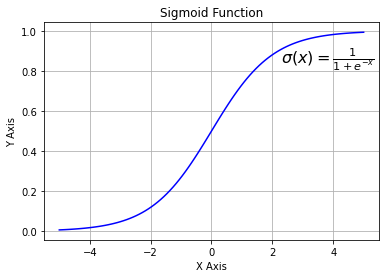

In [43]:
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

In [44]:
from scipy.special import expit
print(expit(3.4))
print(expit([3, 4, 1]))
print(expit(np.array([0.8, 2.3, 8])))

0.9677045353015494
[0.95257413 0.98201379 0.73105858]
[0.68997448 0.90887704 0.99966465]


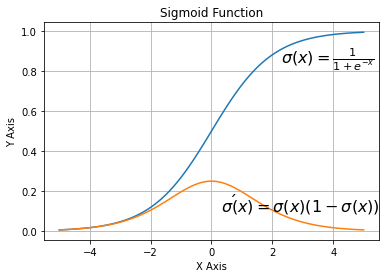

In [45]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
    return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X))
plt.plot(X, sigma(X) * (1 - sigma(X)))
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.text(0.3, 0.1, r'$\sigma\'(x) = \sigma(x)(1 - \sigma(x))$', fontsize=16)
plt.show()

In [46]:
@np.vectorize
def sigmoid(x):
    return 1 / (1 + np.e ** -x)
#sigmoid = np.vectorize(sigmoid)
sigmoid([3, 4, 5])


array([0.95257413, 0.98201379, 0.99330715])

In [47]:
# alternative activation function
def ReLU(x):
    return np.maximum(0.0, x)
# derivation of relu
def ReLU_derivation(x):
    if x <= 0:
        return 0
    else:
        return 1

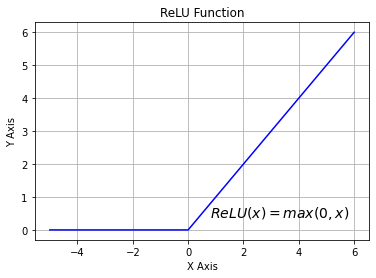

In [48]:
import numpy as np
import matplotlib.pyplot as plt
X = np.linspace(-5, 6, 100)
plt.plot(X, ReLU(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('ReLU Function')
plt.grid()
plt.text(0.8, 0.4, r'$ReLU(x)=max(0, x)$', fontsize=14)
plt.show()


In [49]:
from scipy.special import expit as activation_function

In [50]:
import numpy as np
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
             (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    def __init__(self,
no_of_in_nodes,
no_of_out_nodes,
no_of_hidden_nodes,
learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neur
al network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
        self.no_of_hidden_nodes))
    def train(self, input_vector, target_vector):
        pass
    def run(self, input_vector):
        """
running the network with an input vector 'input_vector'.
'input_vector' can be tuple, list or ndarray
"""  
        # turning the input vector into a column vector
        input_vector = np.array(input_vector, ndmin=2).T
        input_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector = activation_function(self.weights_hidden_out @ input_hidden)
        return output_vector

In [51]:
simple_network = NeuralNetwork(no_of_in_nodes=2,
no_of_out_nodes=2,
no_of_hidden_nodes=4,
learning_rate=0.6)

In [52]:
simple_network.run([(3, 4)])

array([[0.51665112],
       [0.60191022]])

In [53]:
from scipy.special import expit as activation_function
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
         (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
    
    def __init__(self,
no_of_in_nodes,
no_of_out_nodes,
no_of_hidden_nodes,
learning_rate):
        self.no_of_in_nodes = no_of_in_nodes
        self.no_of_out_nodes = no_of_out_nodes
        self.no_of_hidden_nodes = no_of_hidden_nodes
        self.learning_rate = learning_rate
        self.create_weight_matrices()
    def create_weight_matrices(self):
        """ A method to initialize the weight matrices of the neur
al network"""
        rad = 1 / np.sqrt(self.no_of_in_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
                                       self.no_of_in_nodes))
        rad = 1 / np.sqrt(self.no_of_hidden_nodes)
        X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
        self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
                                              self.no_of_hidden_nodes))
    def train(self, input_vector, target_vector):
        """
input_vector and target_vector can be tuples, lists or nda
rrays
"""
        # make sure that the vectors have the right shape
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        target_vector = np.array(target_vector).reshape(target_vector.size, 1)
        output_vector_hidden = activation_function(self.weights_in_hidden @ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ output_vector_hidden)
        output_error = target_vector - output_vector_network
        tmp = output_error * output_vector_network * (1.0 - output_vector_network)
        self.weights_hidden_out += self.learning_rate * (tmp @ output_vector_hidden.T)
        # calculate hidden errors:
        hidden_errors = self.weights_hidden_out.T @ output_error
        # update the weights:
        tmp = hidden_errors * output_vector_hidden * (1.0 - output_vector_hidden)
        self.weights_in_hidden += self.learning_rate * (tmp @ input_vector.T)
    def run(self, input_vector):
        """
running the network with an input vector 'input_vector'.
'input_vector' can be tuple, list or ndarray
"""
    # make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        input4hidden = activation_function(self.weights_in_hidden@ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        return output_vector_network
    def run(self, input_vector):
        """
running the network with an input vector 'input_vector'.
'input_vector' can be tuple, list or ndarray
"""
         # make sure that input_vector is a column vector:
        input_vector = np.array(input_vector)
        input_vector = input_vector.reshape(input_vector.size, 1)
        input4hidden = activation_function(self.weights_in_hidden@ input_vector)
        output_vector_network = activation_function(self.weights_hidden_out @ input4hidden)
        return output_vector_network
    def evaluate(self, data, labels):
        """
Counts how often the actual result corresponds to the
target result.
A result is considered to be correct, if the index of
the maximal value corresponds to the index with the "1"
in the one-hot representation,
e.g.
res = [0.1, 0.132, 0.875]
labels[i] = [0, 0, 1]
"""
        corrects, wrongs = 0, 0
        for i in range(len(data)):
            res = self.run(data[i])
            res_max = res.argmax()
            if res_max == labels[i].argmax():
                corrects += 1
            else:
                wrongs += 1
        return corrects, wrongs



In [54]:
from sklearn.datasets import make_blobs
n_samples = 500
blob_centers = ([2, 6], [6, 2], [7, 7])
n_classes = len(blob_centers)
data, labels = make_blobs(n_samples=n_samples,
centers=blob_centers,
random_state=7)


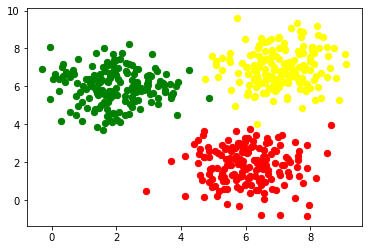

In [55]:
import matplotlib.pyplot as plt
colours = ('green', 'red', "yellow")
fig, ax = plt.subplots()
for n_class in range(n_classes):
    ax.scatter(data[labels==n_class][:, 0],
    data[labels==n_class][:, 1],
    c=colours[n_class],
    s=40,
    label=str(n_class))

In [56]:
labels[:7]

array([2, 2, 1, 0, 2, 0, 1])

In [57]:
import numpy as np
labels = np.arange(n_classes) == labels.reshape(labels.size, 1)
labels = labels.astype(np.float)
labels[:7]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [58]:
from sklearn.model_selection import train_test_split
res = train_test_split(data, labels,
train_size=0.8,
test_size=0.2,
random_state=42)
train_data, test_data, train_labels, test_labels = res
train_labels[:10]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])